In [1]:
# the code have been created with the use of the following websites -> 
#https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07
#https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html
#https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pandas as pd

# generate dataset
X = pd.read_csv("/Users/Hookay/Desktop/CW2/train/x_train_gr_smpl.csv")
Y = pd.read_csv("/Users/Hookay/Desktop/CW2/train/y_train_smpl.csv")
#y=np.ravel(Y)
# define the model
tree_clf = DecisionTreeClassifier(splitter='best',max_depth=5, random_state=42)
# fit the model
tree_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=5, random_state=42)

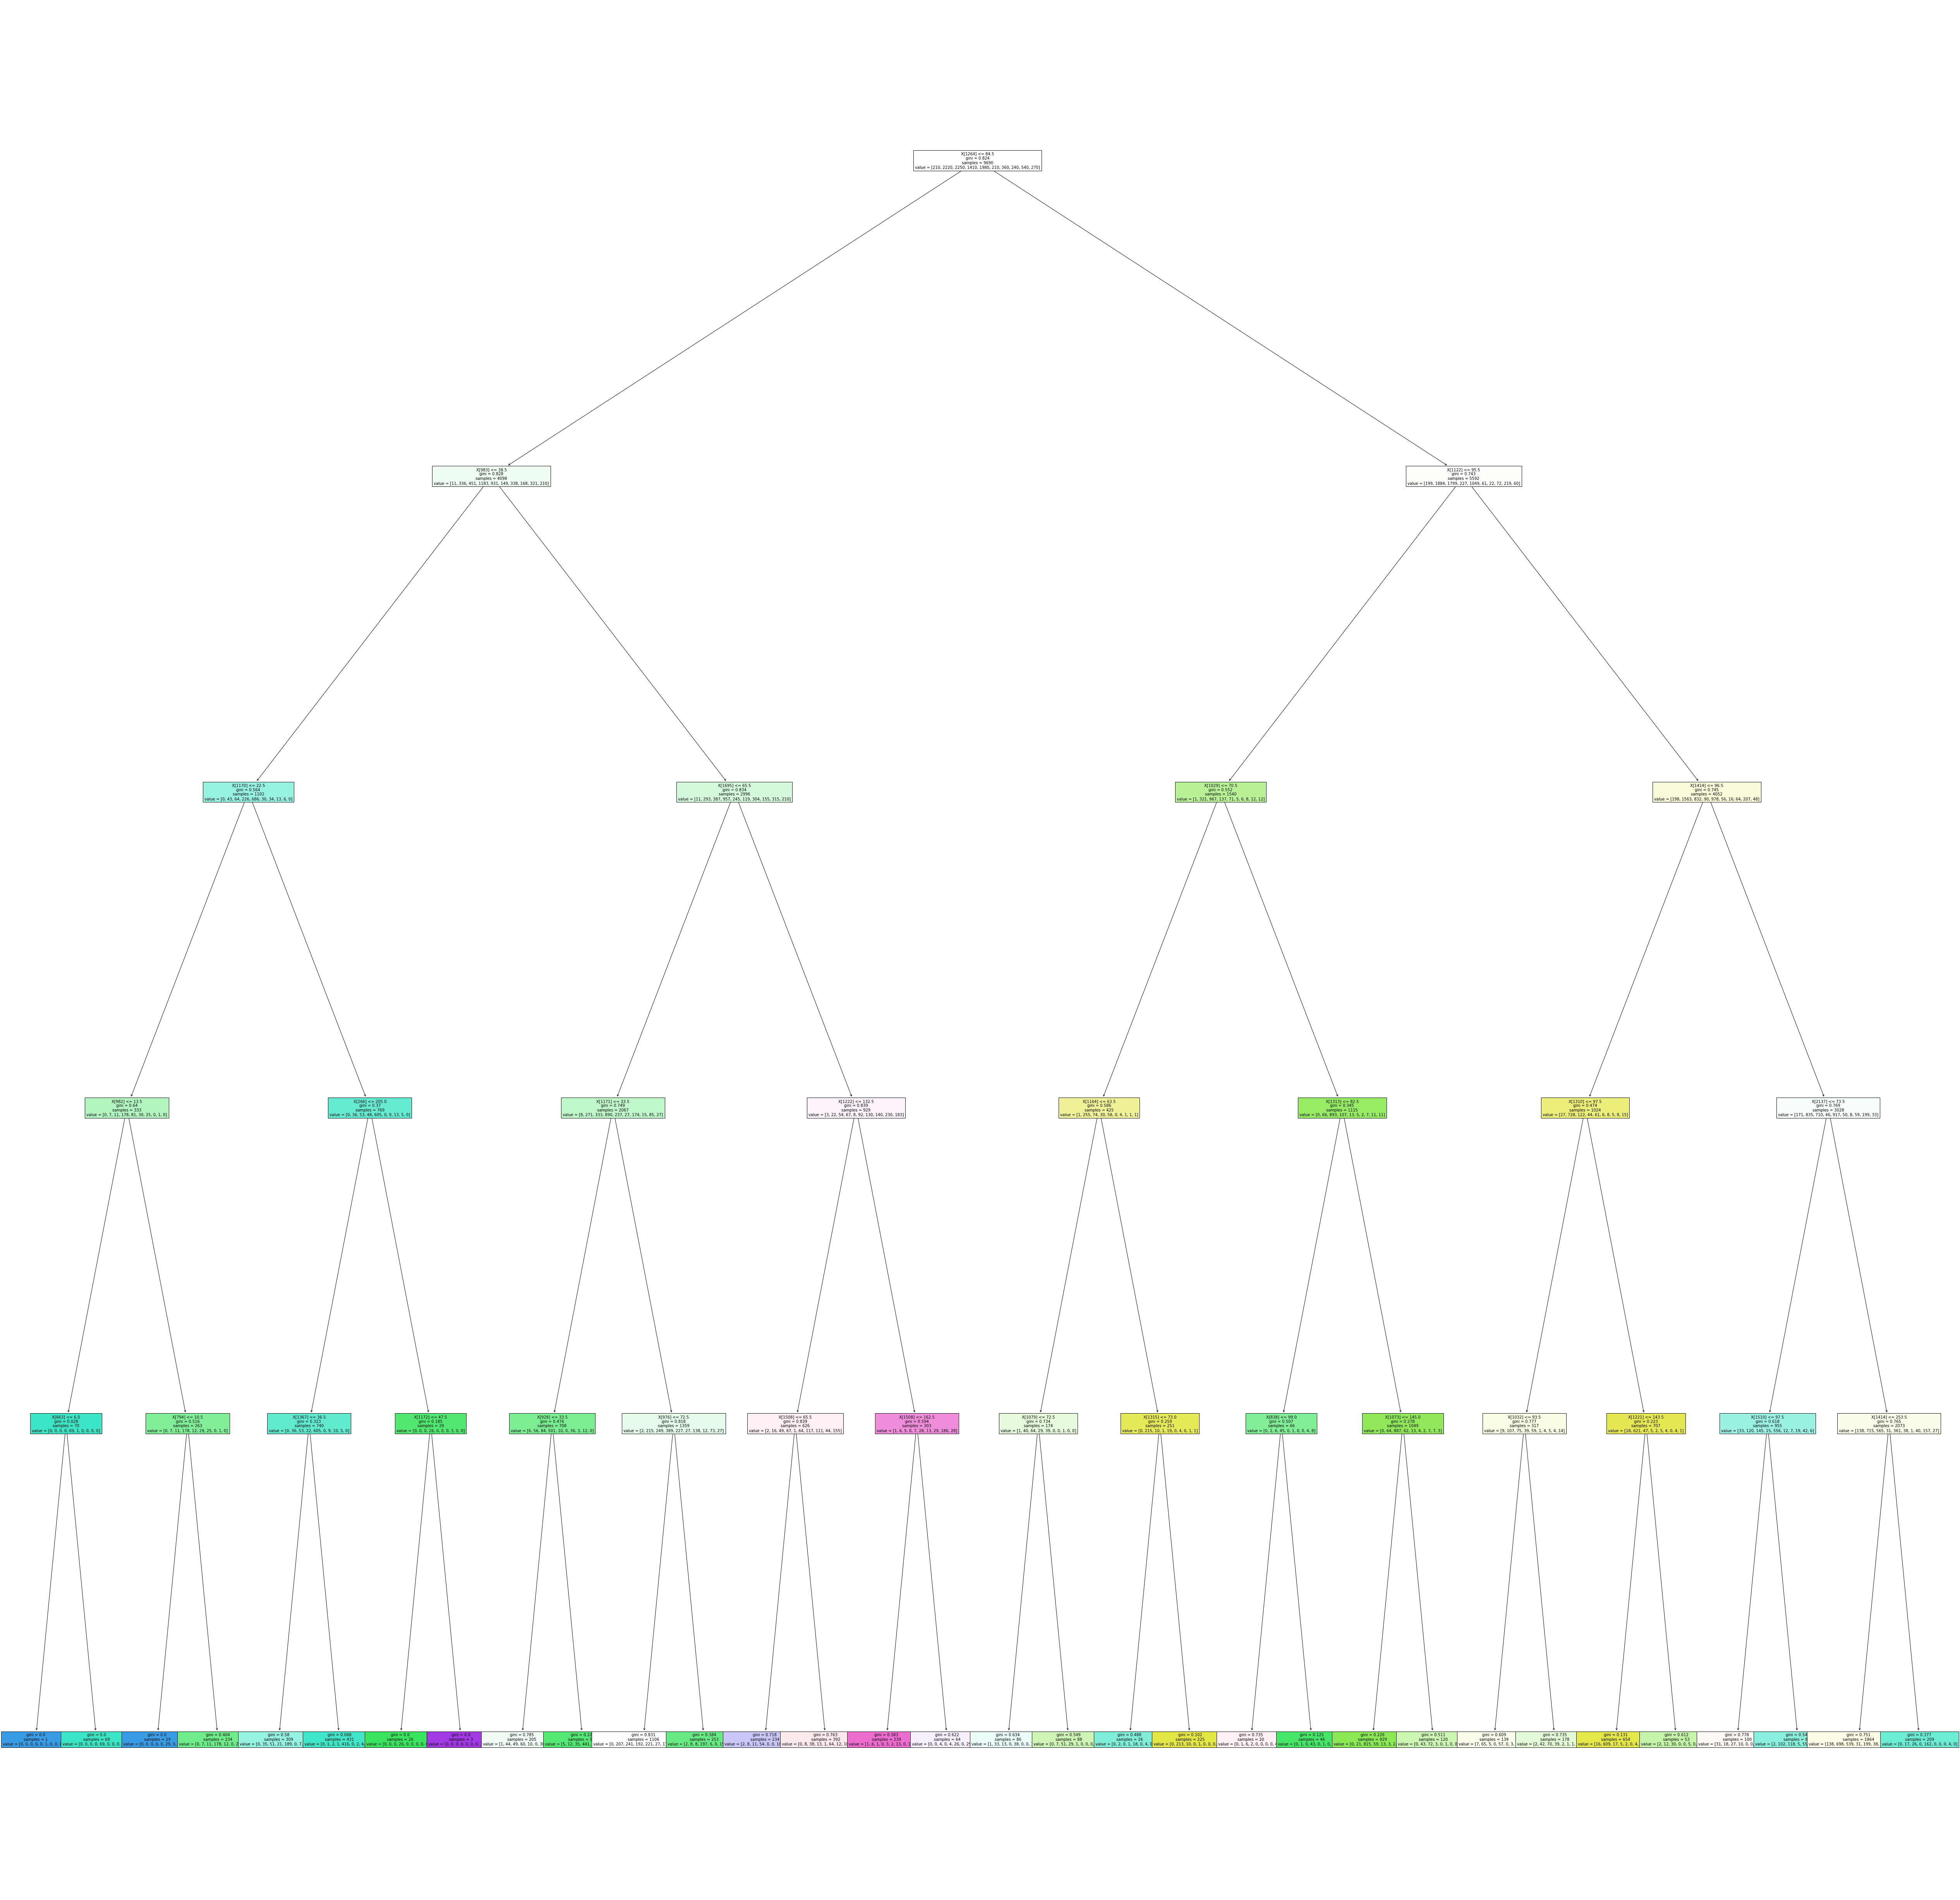

In [3]:
fig, ax = plt.subplots(figsize=(90, 90))
#make fontsize bigger so the data can be read fill it so it is easyer to read
plot_tree(tree_clf, max_depth=5, fontsize=10,filled=True)
plt.show()

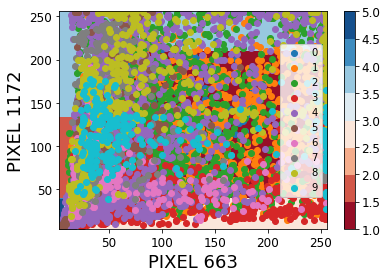

In [4]:
from matplotlib.colors import ListedColormap


# define bounds of the domain
min1, max1 = X.iloc[:, 663].min()-1, X.iloc[:, 663].max()+1
min2, max2 = X.iloc[:, 1172].min()-1, X.iloc[:, 1172].max()+1
   
# define the x and y scale
x1s = np.arange(min1, max1, 0.1)
x2s = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1s, x2s)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
X_new=X.iloc[:,[663,1172]]
# define the model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# fit the model
tree.fit(X_new, Y)
yhat =tree.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# keep just the probabilities for class 0
zz= zz[:, 0]
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
for class_value in range(10):
    
     # get row indexes for samples with  class_value
    row_ix = np.where(Y == class_value)
    r =row_ix[0]
    one=X_new.iloc[:,0]
    two=X_new.iloc[:,1]
    plt.scatter(one[ r], two[ r ], cmap='Paired',label=class_value)
    plt.legend()
    plt.xlabel("PIXEL 663", fontsize=18)
    plt.ylabel("PIXEL 1172", fontsize=18, rotation=90)


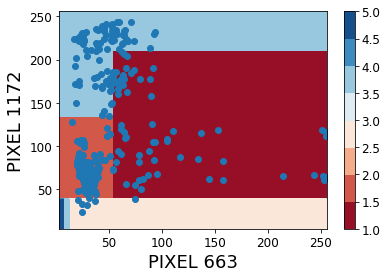

In [5]:
from matplotlib.colors import ListedColormap


# define bounds of the domain
min1, max1 = X.iloc[:, 663].min()-1, X.iloc[:, 663].max()+1
min2, max2 = X.iloc[:, 1172].min()-1, X.iloc[:, 1172].max()+1
   
# define the x and y scale
x1s = np.arange(min1, max1, 0.1)
x2s = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1s, x2s)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
X_new=X.iloc[:,[663,1172]]
# define the model
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# fit the model
tree.fit(X_new, Y)
yhat =tree.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# keep just the probabilities for class 0
zz= zz[:, 0]
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
for class_value in range(1):
    
    # get row indexes for samples with given class change to get it all 0-9
    row_ix = np.where(Y == 7)
    r =row_ix[0]
    one=X_new.iloc[:,0]
    two=X_new.iloc[:,1]
    plt.scatter(one[ r], two[ r ], cmap='Paired',label=class_value)
    plt.xlabel("PIXEL 663", fontsize=18)
    plt.ylabel("PIXEL 1172", fontsize=18, rotation=90)

In [7]:
# read in individual signs
Y_null = pd.read_csv("/Users/Hookay/Desktop/CW2/train/y_train_smpl_9.csv")

In [8]:
# define the model
tree_clf = DecisionTreeClassifier(splitter='best',max_depth=5, random_state=42)
# fit the model
tree_clf.fit(X, Y_null)

DecisionTreeClassifier(max_depth=5, random_state=42)

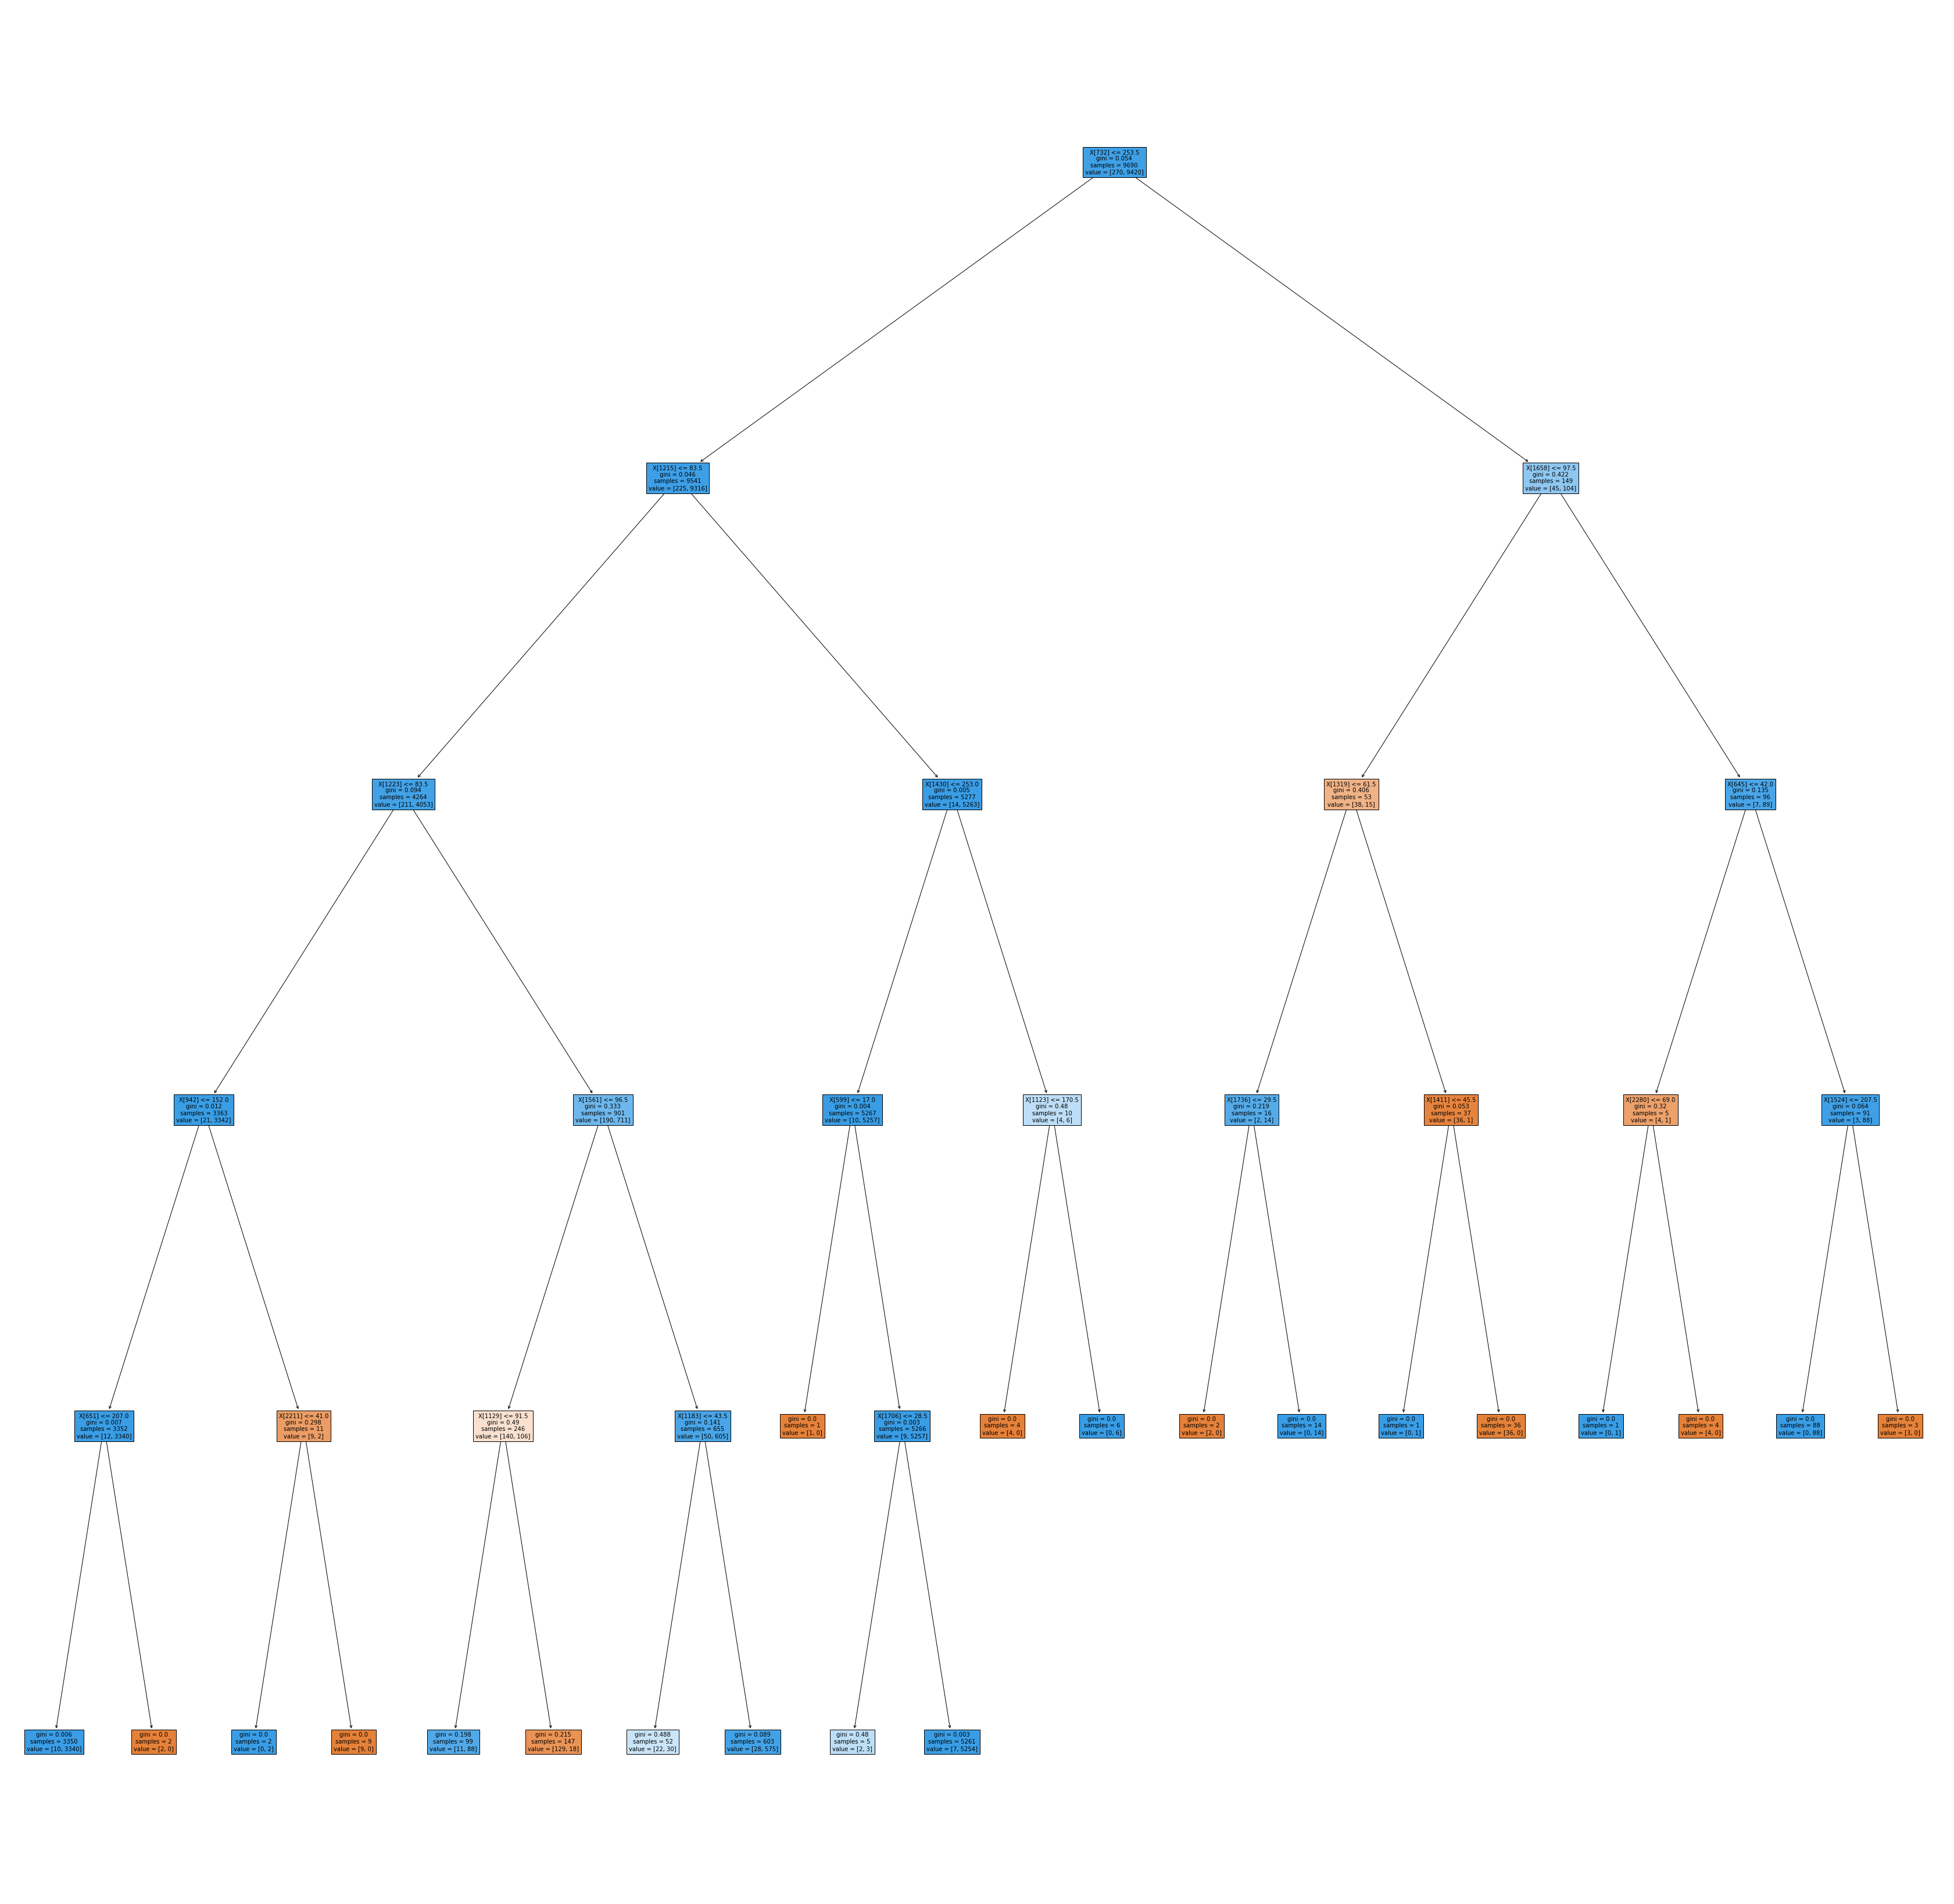

In [10]:
#visualise tree for given class
fig, ax = plt.subplots(figsize=(60, 60))
plot_tree(tree_clf, max_depth=5, fontsize=10,filled=True)
plt.show()